In [3]:
import pickle
with open('amewoo_mop_params_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    params = pickle.load(f)
with open('amewoo_mop_losses_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    losses = pickle.load(f)

In [3]:
import pickle
import os

losses = {}

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/training_speed_stress_test/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

In [2]:
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/number_of_components_1d_grid_search/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

TypeError: '<' not supported between instances of 'str' and 'int'

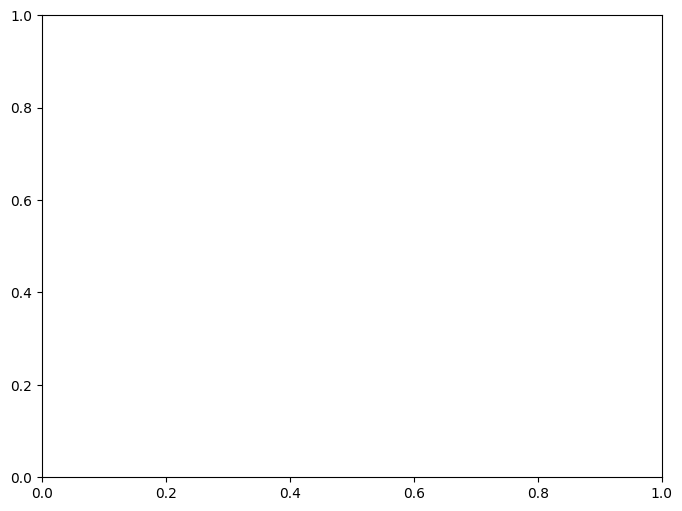

In [44]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    if key < 60 and key > 15:
        continue
    ax.plot(losses[key], label=f"n={key}")
ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: ew=1e-4, dw=1e-2, dp=0.4, varying n"
    
)
plt.show()

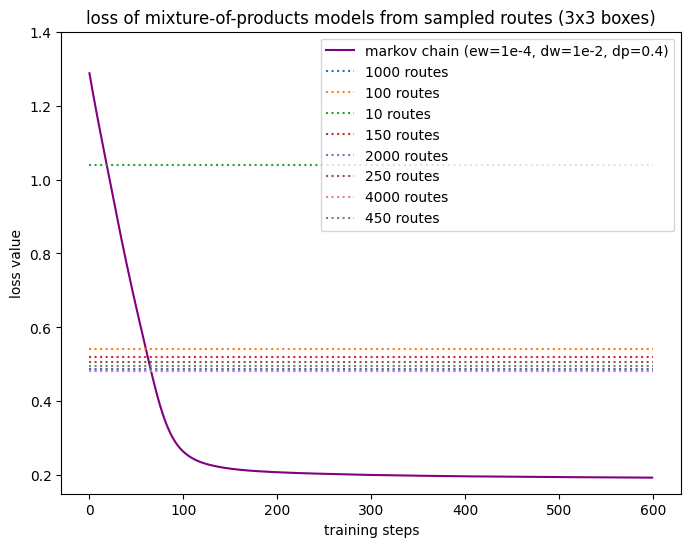

In [49]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(markov_losses, label="markov chain (ew=1e-4, dw=1e-2, dp=0.4)", color="purple")
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
for fname in os.listdir(storage_dir):
    if 'params' in fname:
        with open(os.path.join(storage_dir, fname), 'rb') as f:
            mop_from_routes_results = pickle.load(f)
        n_routes = mop_from_routes_results['n']
        ys = np.empty(2)
        ys.fill(mop_from_routes_results['losses'][0])
        if mop_from_routes_results['radius'] == 3:
            ax.plot([0, 600], ys, label=f'{n_routes} routes', linestyle='dotted')

for key in sorted(losses.keys()):
    if key == 1000:
        ax.plot(losses[key], label=f"mixture of products (n={key})")

ax.set(title="loss of mixture-of-products models from sampled routes (3x3 boxes)",
      xlabel=f"training steps",
    ylabel=f"loss value",
      ylim=(0.15, 1.4))
ax.legend(loc="upper right")
plt.show()

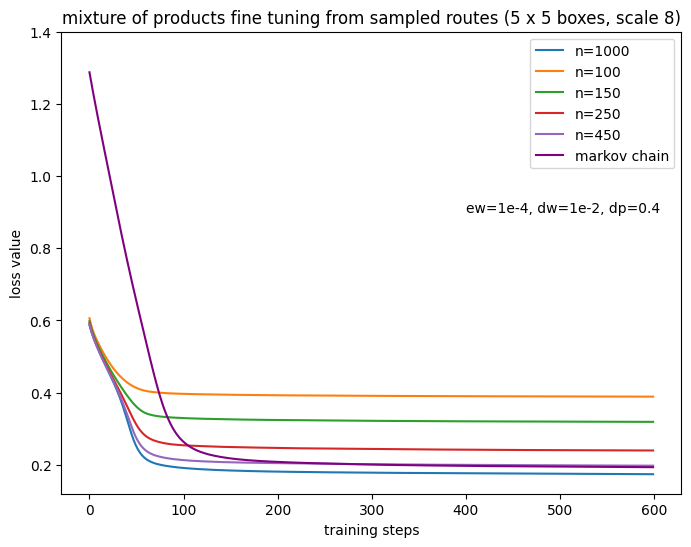

In [12]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt

losses = {}
box_size = 5
box_scale = 8
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_mc_sampled_components/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    n = int(fname.split('_')[-4].strip('n'))
    dim = int(fname.split('_')[-2].strip('dim'))
    scale=float(fname.split('_')[-1].strip('scale').strip('.pkl'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[f'{n}_{dim}_{scale}'] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    n, dim, scale = list(map(float, key.split('_')))
    if dim==box_size and scale == box_scale:
        ax.plot(losses[key], label=f"n={int(n)}")

# storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
# for fname in os.listdir(storage_dir):
#     if 'params' in fname:
#         with open(os.path.join(storage_dir, fname), 'rb') as f:
#             mop_from_routes_results = pickle.load(f)
#         n_routes = mop_from_routes_results['n']
#         ys = np.empty(2)
#         ys.fill(mop_from_routes_results['losses'][0])
#         if mop_from_routes_results['radius'] == 1:
#             ax.plot([0, 600], ys, label=f'{n_routes} routes', linestyle='dotted')

ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title=f"mixture of products fine tuning from sampled routes ({box_size} x {box_size} boxes, scale {box_scale})",
    ylim=(0.12, 1.4)
)
ax.text(400, 0.90, "ew=1e-4, dw=1e-2, dp=0.4")
plt.show()

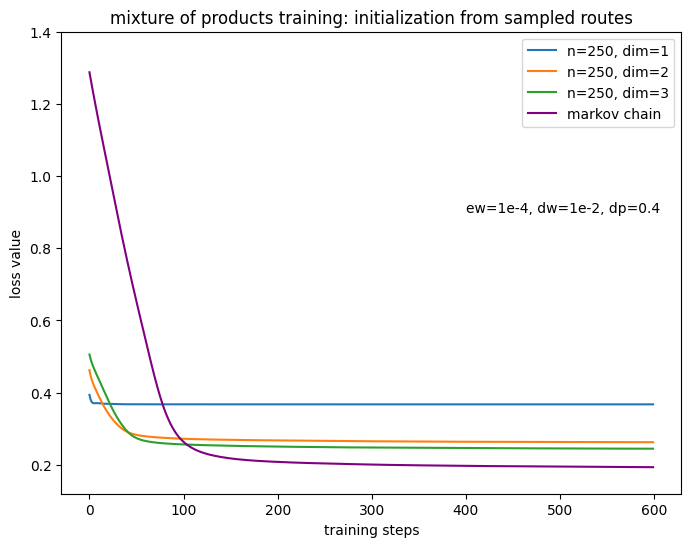

In [32]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt

losses = {}

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_mc_sampled_components_sanity_check/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    n = int(fname.split('_')[-4].strip('n'))
    dim = int(fname.split('_')[-2].strip('dim'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[f'{n}_{dim}'] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    n, dim = list(map(int, key.split('_')))
    if n==250:
        ax.plot(losses[key], label=f"n={n}, dim={dim}")

ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: initialization from sampled routes",
    ylim=(0.12, 1.4)
)
ax.text(400, 0.90, "ew=1e-4, dw=1e-2, dp=0.4")
#print(losses["1000_2"])
plt.show()